In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
url = "/Users/anmoldesai/Desktop/Northeastern/Q4/Predictive Analytics/Week 1/adult-all-1.csv"

In [3]:
df = pd.read_csv(url, header = None)

In [4]:
df.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "gender", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
print(df.income.value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


Data Cleaning

In [9]:
df = df.replace('?', np.NaN)

In [10]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [11]:
df.workclass.mode()

0    Private
dtype: object

In [12]:
wc = df.workclass.mode()[0]

In [13]:
df.workclass = df.workclass.replace(np.NaN, wc)

In [14]:
df.occupation.mode()

0    Prof-specialty
dtype: object

In [15]:
occ = df.occupation.mode()[0]

In [16]:
df.occupation = df.occupation.replace(np.NaN, occ)

In [17]:
df.native_country.mode()

0    United-States
dtype: object

In [18]:
country = df.native_country.mode()[0]

In [19]:
df.native_country = df.native_country.replace(np.NaN, country)

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [21]:
df1 = df.drop(['marital_status', 'relationship'], axis=1)
df1

,age,workclass,fnlwgt,education,education_num,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Prof-specialty,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Prof-specialty,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Prof-specialty,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Converting String Variables

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['workclass', 'education', 'occupation', 'race', 'gender','native_country','income']
for col in cols:
    df1[col] = le.fit_transform(df[col])

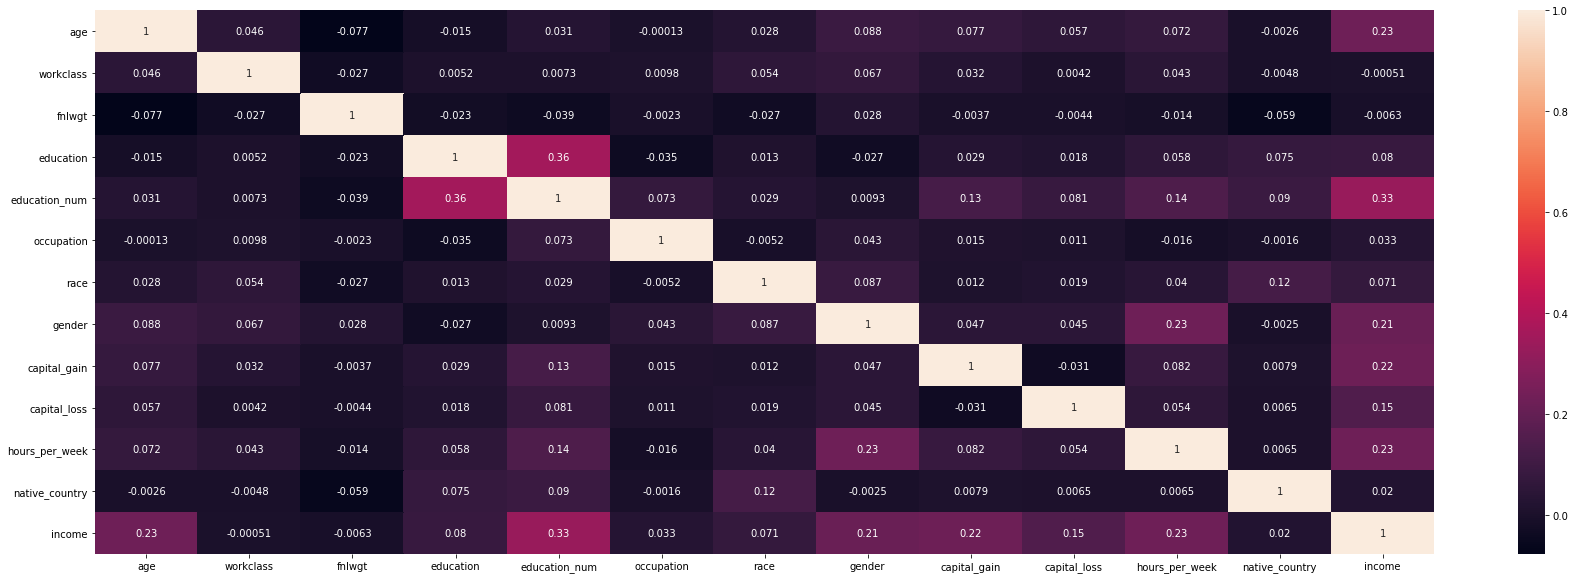

In [23]:
corr = df1.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [24]:
df2 = df1.drop(['fnlwgt','native_country'], axis=1)
df2

,age,workclass,education,education_num,occupation,race,gender,capital_gain,capital_loss,hours_per_week,income
0,39,6,9,13,0,4,1,2174,0,40,0
1,50,5,9,13,3,4,1,0,0,13,0
2,38,3,11,9,5,4,1,0,0,40,0
3,53,3,1,7,5,2,1,0,0,40,0
4,28,3,9,13,9,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,9,13,9,4,0,0,0,36,0
48838,64,3,11,9,9,2,1,0,0,40,0
48839,38,3,9,13,9,4,1,0,0,50,0
48840,44,3,9,13,0,1,1,5455,0,40,0


#Splitting Data

In [25]:
X = df2.drop('income', axis = 1)
y = df2['income']

In [26]:
X

,age,workclass,education,education_num,occupation,race,gender,capital_gain,capital_loss,hours_per_week
0,39,6,9,13,0,4,1,2174,0,40
1,50,5,9,13,3,4,1,0,0,13
2,38,3,11,9,5,4,1,0,0,40
3,53,3,1,7,5,2,1,0,0,40
4,28,3,9,13,9,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...
48837,39,3,9,13,9,4,0,0,0,36
48838,64,3,11,9,9,2,1,0,0,40
48839,38,3,9,13,9,4,1,0,0,50
48840,44,3,9,13,0,1,1,5455,0,40


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

# Applying KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

In [29]:
for k in range(10):
    k = k + 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=k)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    print(("Test accuracy for the k value " + str(k) + ":", knn.score(X_test, y_test)*100))
    

('Test accuracy for the k value 1:', 82.85392568328386)
('Test accuracy for the k value 2:', 82.49564950353158)
('Test accuracy for the k value 3:', 82.7515610604975)
('Test accuracy for the k value 4:', 82.50588596581021)
('Test accuracy for the k value 5:', 83.90828129798341)
('Test accuracy for the k value 6:', 82.7003787491043)
('Test accuracy for the k value 7:', 82.52635889036749)
('Test accuracy for the k value 8:', 83.3145664858225)
('Test accuracy for the k value 9:', 83.36574879721567)
('Test accuracy for the k value 10:', 82.7003787491043)


#Top three K values and there accuracy
# Accuracy came out to be 83.90% where k = 5
# Accuracy came out to be 83.31% where k = 8
# Accuracy came out to be 83.36% where k = 9